# Julia version of [Ramsey Plans, Time Inconsistency, Sustainable Plans](https://python-advanced.quantecon.org/calvo.html)
Min Kim (min.kim@rutgers.edu), May 1, 2020

In [1]:
using Parameters
using ForwardDiff, LinearAlgebra, QuantEcon
using Plots, LaTeXStrings

## Overview

This lecture describes a linear-quadratic version of a model that Guillermo Calvo [[Cal78]](https://python-programming.quantecon.org/zreferences.html#calvo1978)
used to illustrate the **time inconsistency** of optimal government
plans.

Like Chang [[Cha98]](https://python-programming.quantecon.org/zreferences.html#chang1998credible), we use the model as a laboratory in which to explore the consequences of
different timing protocols for government decision making.

The model focuses attention on intertemporal tradeoffs between

- welfare benefits that anticipated deflation generates by increasing a representative agent’s liquidity as measured by his or her real money balances, and  
- costs associated with  distorting taxes that must be used to withdraw money from the economy in order to generate anticipated deflation  


The model features

- rational expectations  
- costly government actions at all dates $ t \geq 1 $ that increase household
  utilities at dates before $ t $  
- two Bellman equations, one that expresses the private sector’s  expectation of future inflation
  as a function of current and future government actions, another that
  describes  the value function of a  Ramsey planner  


A theme of this lecture is that  timing protocols affect  outcomes.

We’ll use ideas from  papers by Cagan [[Cag56]](https://python-programming.quantecon.org/zreferences.html#cagan), Calvo [[Cal78]](https://python-programming.quantecon.org/zreferences.html#calvo1978), Stokey [[Sto89]](https://python-programming.quantecon.org/zreferences.html#stokey1989reputation), [[Sto91]](https://python-programming.quantecon.org/zreferences.html#stokey1991),
Chari and Kehoe [[CK90]](https://python-programming.quantecon.org/zreferences.html#chari1990sustainable), Chang [[Cha98]](https://python-programming.quantecon.org/zreferences.html#chang1998credible), and Abreu [[Abr88]](https://python-programming.quantecon.org/zreferences.html#abreu) as
well as from chapter 19 of [[LS18]](https://python-programming.quantecon.org/zreferences.html#ljungqvist2012).

In addition, we’ll use ideas from linear-quadratic dynamic programming
described in  [Linear Quadratic Control](https://python-intro.quantecon.org/lqcontrol.html) as applied to Ramsey problems
in [Stackelberg problems](https://python-programming.quantecon.org/dyn_stack.html).

In particular, we have specified the model in a way that allows us to use
linear-quadratic dynamic programming to compute an optimal government
plan under a timing protocol in which a government chooses an infinite
sequence of money supply growth rates once and for all at time
$ 0 $.

We’ll start with some imports:

## The Model

There is no uncertainty.

Let:

- $ p_t $ be the log of the price level  
- $ m_t $ be the log of nominal money balances  
- $ \theta_t = p_{t+1} - p_t $ be the net rate of inflation between $ t $ and $ t+1 $  
- $ \mu_t = m_{t+1} - m_t $ be the net rate of growth of nominal balances  


The demand for real balances is governed by a perfect foresight
version of the Cagan [[Cag56]](https://python-programming.quantecon.org/zreferences.html#cagan) demand function:


<a id='equation-eq-old1'></a>
$$
m_t - p_t = -\alpha(p_{t+1} - p_t) \: , \: \alpha > 0 \tag{1}
$$

for $ t \geq 0 $.

Equation [(1)](#equation-eq-old1) asserts that the demand for real balances is inversely
related to the public’s expected rate of inflation, which here equals
the actual rate of inflation.

(When there is no uncertainty, an assumption of **rational expectations** simplifies to **perfect foresight**).

(See [[Sar77]](https://python-programming.quantecon.org/zreferences.html#sargent77hyper) for a rational expectations version of the model when there is uncertainty)

Subtracting the demand function at time $ t $ from the demand
function at $ t+1 $ gives:

$$
\mu_t - \theta_t = -\alpha \theta_{t+1} + \alpha \theta_t
$$

or


<a id='equation-eq-old2'></a>
$$
\theta_t = \frac{\alpha}{1+\alpha} \theta_{t+1} + \frac{1}{1+\alpha} \mu_t \tag{2}
$$

Because $ \alpha > 0 $,  $ 0 < \frac{\alpha}{1+\alpha} < 1 $.

**Definition:** For a scalar $ x_t $, let $ L^2 $ be the space of sequences
$ \{x_t\}_{t=0}^\infty $ satisfying

$$
\sum_{t=0}^\infty  x_t^2 < +\infty
$$

We say that a sequence that belongs to $ L^2 $   is **square summable**.

When we assume that the sequence $ \vec \mu = \{\mu_t\}_{t=0}^\infty $ is square summable and we require that the sequence
$ \vec \theta = \{\theta_t\}_{t=0}^\infty $ is square summable,
the linear difference equation [(2)](#equation-eq-old2) can be solved forward to get:


<a id='equation-eq-old3'></a>
$$
\theta_t = \frac{1}{1+\alpha} \sum_{j=0}^\infty \left(\frac{\alpha}{1+\alpha}\right)^j \mu_{t+j} \tag{3}
$$

**Insight:** In the spirit of Chang [[Cha98]](https://python-programming.quantecon.org/zreferences.html#chang1998credible), note that equations [(1)](#equation-eq-old1) and [(3)](#equation-eq-old3) show that $ \theta_t $ intermediates
how choices of $ \mu_{t+j}, \ j=0, 1, \ldots $ impinge on time $ t $
real balances $ m_t - p_t = -\alpha \theta_t $.

We shall use this insight to help us simplify and analyze government policy problems.

That future rates of money creation influence earlier rates of inflation
creates optimal government policy problems in which timing protocols
matter.

We can rewrite the model  as:

$$
\begin{bmatrix}
  1 \\
  \theta_{t+1}
\end{bmatrix} =
\begin{bmatrix}
  1 & 0 \\
  0 & \frac{1+\alpha}{\alpha}
\end{bmatrix}
\begin{bmatrix}
  1 \\
  \theta_{t}
\end{bmatrix}  +
\begin{bmatrix}
  0 \\
  -\frac{1}{\alpha}
\end{bmatrix}
\mu_t
$$

or


<a id='equation-eq-old4'></a>
$$
x_{t+1} = A x_t + B \mu_t \tag{4}
$$

We write the model in the state-space form [(4)](#equation-eq-old4) even though $ \theta_0 $ is to be determined and so is not an initial condition
as it ordinarily would be in the state-space model described in [Linear Quadratic Control](https://python-intro.quantecon.org/lqcontrol.html).

We write the model in the form [(4)](#equation-eq-old4) because we want to apply an approach described in  [Stackelberg problems](https://python-programming.quantecon.org/dyn_stack.html).

Assume that a representative household’s utility of real balances at
time $ t $ is:


<a id='equation-eq-old5'></a>
$$
U(m_t - p_t) = a_0 + a_1 (m_t - p_t) - \frac{a_2}{2} (m_t - p_t)^2, \quad a_0 > 0, a_1 > 0, a_2 > 0 \tag{5}
$$

The “bliss level” of real balances is then $ \frac{a_1}{a_2} $.

The money demand function [(1)](#equation-eq-old1) and the utility function [(5)](#equation-eq-old5)
imply that utility maximizing or  bliss level of real balances is attained when:

$$
\theta_t = \theta^* = -\frac{a_1}{a_2 \alpha}
$$

Below, we introduce the discount factor $ \beta \in (0,1) $ that a representative household and a benevolent government
both use to discount future utilities.

(If we set parameters so that $ \theta^* = \log(\beta) $, then we can
regard a recommendation to set $ \theta_t = \theta^* $ as a “poor
man’s Friedman rule” that attains Milton Friedman’s **optimal quantity of money**)

Via equation [(3)](#equation-eq-old3), a government plan
$ \vec \mu = \{\mu_t \}_{t=0}^\infty $ leads to an equilibrium
sequence of inflation outcomes
$ \vec \theta = \{ \theta_t \}_{t=0}^\infty $.

We assume that social costs $ \frac{c}{2} \mu_t^2 $ are incurred at
$ t $ when the government changes the stock of nominal money
balances at rate $ \mu_t $.

Therefore, the one-period welfare function of a benevolent government
is:


<a id='equation-eq-old6'></a>
$$
-s(\theta_t, \mu_t) \equiv - r(x_t,\mu_t) = \begin{bmatrix} 1 \\ \theta_t \end{bmatrix}' \begin{bmatrix} a_0 & -\frac{a_1 \alpha}{2} \\ -\frac{a_1 \alpha}{2} & -\frac{a_2 \alpha^2}{2} \end{bmatrix} \begin{bmatrix} 1 \\ \theta_t \end{bmatrix} - \frac{c}{2} \mu_t^2 =  - x_t'Rx_t - Q \mu_t^2 \tag{6}
$$

Household welfare is summarized by:


<a id='equation-eq-old7'></a>
$$
v_0 = - \sum_{t=0}^\infty \beta^t r(x_t,\mu_t) = - \sum_{t=0}^\infty \beta^t s(\theta_t,\mu_t) \tag{7}
$$

We can represent the dependence of  $ v_0 $ on $ (\vec \theta, \vec \mu) $ recursively via the linear difference equation


<a id='equation-eq-old8'></a>
$$
v_t = - s(\theta_t, \mu_t) + \beta v_{t+1} \tag{8}
$$

## Structure

The following structure is induced by private agents’
behavior as summarized by the demand function for money [(1)](#equation-eq-old1) that leads to equation [(3)](#equation-eq-old3) that tells how future
settings of $ \mu $ affect the current value of $ \theta $.

Equation [(3)](#equation-eq-old3) maps a **policy** sequence of money growth rates
$ \vec \mu =\{\mu_t\}_{t=0}^\infty \in L^2 $  into an inflation sequence
$ \vec \theta = \{\theta_t\}_{t=0}^\infty \in L^2 $.

These, in turn, induce a discounted value to a government sequence
$ \vec v = \{v_t\}_{t=0}^\infty \in L^2 $ that satisfies the
recursion

$$
v_t = - s(\theta_t,\mu_t) + \beta v_{t+1}
$$

where we have called $ s(\theta_t, \mu_t) = r(x_t, \mu_t) $ as
above.

Thus, we have a triple of sequences
$ \vec \mu, \vec \theta, \vec v $ associated with a
$ \vec \mu \in L^2 $.

At this point $ \vec \mu \in L^2 $ is an arbitrary exogenous policy.

To make $ \vec \mu $ endogenous, we require a theory of government
decisions.

## Intertemporal Influences

Criterion function [(7)](#equation-eq-old7) and the constraint system [(4)](#equation-eq-old4) exhibit the following
structure:

- Setting $ \mu_t \neq 0 $ imposes costs
  $ \frac{c}{2} \mu_t^2 $ at time $ t $ and at no other times;
  but  
- The money growth rate $ \mu_t $ affects the representative
  household’s one-period utilities at all dates
  $ s = 0, 1, \ldots, t $.  


That settings of $ \mu $ at one date affect household utilities at
earlier dates sets the stage for the emergence of a time-inconsistent
optimal government plan  under a Ramsey (also called a Stackelberg)  timing protocol.

We’ll study outcomes under a Ramsey timing protocol below.

But we’ll also study the consequences of other timing protocols.

## Four Models of Government Policy

We consider four models of policymakers that  differ in

- what a policymaker is allowed to choose, either a sequence
  $ \vec \mu $ or just a single period  $ \mu_t $.  
- when a policymaker chooses, either at time $ 0 $ or at times
  $ t \geq 0 $.  
- what a policymaker assumes about how its choice of $ \mu_t $
  affects private agents’ expectations about earlier and later
  inflation rates.  


In two of our models, a single policymaker  chooses a sequence
$ \{\mu_t\}_{t=0}^\infty $ once and for all, taking into account how
$ \mu_t $ affects household one-period utilities at dates $ s = 0, 1, \ldots, t-1 $

- these two models  thus employ a  **Ramsey** or **Stackelberg** timing protocol.  


In two other models, there is a sequence of policymakers, each of whom
sets $ \mu_t $ at one $ t $ only

- Each such policymaker ignores  effects that its choice of $ \mu_t $ has on household one-period utilities at dates $ s = 0, 1, \ldots, t-1 $.  


The four models differ with respect to timing protocols, constraints on
government choices, and government policymakers’ beliefs about how their
decisions affect private agents’ beliefs about future government
decisions.

The models are

- A single Ramsey planner chooses a sequence
  $ \{\mu_t\}_{t=0}^\infty $ once and for all at time $ 0 $.  
- A single Ramsey planner chooses a sequence
  $ \{\mu_t\}_{t=0}^\infty $ once and for all at time $ 0 $
  subject to the constraint that $ \mu_t = \mu $ for all
  $ t \geq 0 $.  
- A sequence of separate policymakers chooses $ \mu_t $ for $ t =0, 1, 2, \ldots $  
  
  - a time $ t $ policymaker chooses $ \mu_t $ only and forecasts that future government decisions are unaffected by its choice.  
  
- A sequence of separate policymakers chooses $ \mu_t $ for $ t =0, 1, 2, \ldots $  
  
  - a time $ t $ policymaker chooses  only $ \mu_t $ but believes that its choice of $ \mu_t $  shapes private agents’ beliefs about  future rates of money creation and inflation, and through them, future government actions.  

## A Ramsey Planner

First, we consider a Ramsey planner that  chooses
$ \{\mu_t, \theta_t\}_{t=0}^\infty $ to maximize [(7)](#equation-eq-old7)
subject to the law of motion [(4)](#equation-eq-old4).

We can split this problem into two stages, as in [Stackelberg problems](https://python-programming.quantecon.org/dyn_stack.html) and  [[LS18]](https://python-programming.quantecon.org/zreferences.html#ljungqvist2012) Chapter 19.

In the first stage, we take the initial inflation rate $ \theta_0 $ as given,
and then solve the resulting LQ dynamic programming problem.

In the second stage, we maximize over the initial inflation rate $ \theta_0 $.

Define a feasible set of
$ (\overrightarrow x_1, \overrightarrow \mu_0) $ sequences:

$$
\Omega(x_0) = \left \lbrace ( \overrightarrow x_1, \overrightarrow \mu_0) : x_{t+1}
= A x_t + B \mu_t \: , \: \forall t \geq 0 \right \rbrace
$$

### Subproblem 1

The value function

$$
J(x_0) = \max_{(\overrightarrow x_1, \overrightarrow \mu_0) \in \Omega(x_0)}
- \sum_{t=0}^\infty \beta^t r(x_t,\mu_t)
$$

satisfies the Bellman equation

$$
J(x) = \max_{\mu,x'}\{-r(x,\mu) + \beta J(x')\}
$$

subject to:

$$
x' = Ax + B\mu
$$

As in [Stackelberg problems](https://python-programming.quantecon.org/dyn_stack.html), we map this problem into a linear-quadratic control problem and then carefully use the
optimal value function associated with it.

Guessing that $ J(x) = - x'Px $ and substituting into the Bellman
equation gives rise to the algebraic matrix Riccati equation:

$$
P = R + \beta A'PA - \beta^2 A'PB(Q + \beta B'PB)^{-1} B'PA
$$

and the optimal decision rule

$$
\mu_t = - F x_t
$$

where

$$
F = \beta (Q + \beta B'PB)^{-1} B'PA
$$

The QuantEcon [LQ](https://github.com/QuantEcon/QuantEcon.py/blob/master/quantecon/lqcontrol.py) class solves for $ F $ and $ P $ given inputs
$ Q, R, A, B $, and $ \beta $.

### Subproblem 2

The value of the Ramsey problem is

$$
V = \max_{x_0} J(x_0)
$$

The value function

$$
J(x_0) = -\begin{bmatrix} 1 & \theta_0 \end{bmatrix} \begin{bmatrix} P_{11} & P_{12} \\ P_{21} & P_{22} \end{bmatrix} \begin{bmatrix} 1 \\ \theta_0 \end{bmatrix} = -P_{11} - 2 P_{21} \theta_0 - P_{22} \theta_0^2
$$

Maximizing this with respect to $ \theta_0 $ yields the FOC:

$$
- 2 P_{21} - 2 P_{22} \theta_0 =0
$$

which implies

$$
\theta_0^* = - \frac{P_{21}}{P_{22}}
$$

### Representation of Ramsey Plan

The preceding calculations indicate that we can represent a Ramsey plan
$ \vec \mu $ recursively with the following system created in the spirit of Chang [[Cha98]](https://python-programming.quantecon.org/zreferences.html#chang1998credible):


<a id='equation-eq-old9'></a>
$$
\begin{aligned}
\theta_0 & = \theta_0^* \\
\mu_t &  = b_0 + b_1 \theta_t \\
\theta_{t+1} & = d_0 + d_1 \theta_t
\end{aligned} \tag{9}
$$

To interpret this system, think of the  sequence
$ \{\theta_t\}_{t=0}^\infty $ as a sequence of
synthetic **promised inflation rates** that are just computational devices for
generating a sequence $ \vec\mu $ of money growth rates that are to
be substituted into equation [(3)](#equation-eq-old3) to form actual rates of inflation.

It can be verified that if we substitute a plan
$ \vec \mu = \{\mu_t\}_{t=0}^\infty $ that satisfies these equations
into equation [(3)](#equation-eq-old3), we obtain the same sequence $ \vec \theta $
generated by the system [(9)](#equation-eq-old9).

(Here an application of the Big $ K $, little $ k $ trick could once again be enlightening)

Thus, our construction of a Ramsey plan guarantees that **promised
inflation** equals **actual inflation**.

### Multiple roles of $ \theta_t $

The inflation rate $ \theta_t $ that appears in the system [(9)](#equation-eq-old9) and
equation [(3)](#equation-eq-old3) plays three roles simultaneously:

- In equation [(3)](#equation-eq-old3), $ \theta_t $ is the actual rate of inflation
  between $ t $ and $ t+1 $.  
- In equation  [(2)](#equation-eq-old2) and [(3)](#equation-eq-old3), $ \theta_t $ is also the public’s
  expected rate of inflation between $ t $ and $ t+1 $.  
- In system [(9)](#equation-eq-old9), $ \theta_t $ is a promised rate of inflation
  chosen by the Ramsey planner at time $ 0 $.  

### Time Inconsistency

As discussed in [Stackelberg problems](https://python-programming.quantecon.org/dyn_stack.html) and [Optimal taxation with state-contingent debt](https://python-programming.quantecon.org/opt_tax_recur.html), a continuation Ramsey plan is not a Ramsey plan.

This is a concise way of characterizing the time inconsistency of a Ramsey plan.

The time inconsistency of a Ramsey plan has motivated other models of government decision making
that alter either

- the timing protocol and/or  
- assumptions about how government decision makers think their decisions affect private agents’ beliefs about future government decisions  

## A Constrained-to-a-Constant-Growth-Rate Ramsey Government

We now consider the following peculiar model of optimal government behavior.

We have created this model in order to highlight an aspect of an optimal government policy associated with its time inconsistency,
namely, the feature that optimal settings of the  policy instrument vary over time.

Instead of allowing the Ramsey government to choose different settings of its instrument at different moments, we now assume that
at time $ 0 $, a Ramsey  government at time $ 0 $ once and for all  chooses a **constant** sequence
$ \mu_t = \check \mu $ for all $ t \geq 0 $ to maximize

$$
U(-\alpha \check \mu) - \frac{c}{2} \check \mu^2
$$

Here we have imposed the perfect foresight outcome implied by equation [(2)](#equation-eq-old2) that
$ \theta_t = \check \mu $ when the government chooses a constant
$ \mu $ for all $ t \geq 0 $.

With the quadratic form [(5)](#equation-eq-old5) for the utility function $ U $, the
maximizing $ \bar \mu $ is

$$
\check \mu = - \frac{\alpha a_1}{\alpha^2 a_2 + c }
$$

**Summary:** We have  introduced the constrained-to-a-constant $ \mu $
government in order to highlight  time-variation of
$ \mu_t $ as a telltale sign of  time inconsistency of a Ramsey plan.

## Markov Perfect Governments

We now  change the timing protocol by considering a sequence of
government policymakers, the time $ t $ representative of which
chooses $ \mu_t $ and expects all future governments to set
$ \mu_{t+j} = \bar \mu $.

This assumption mirrors an assumption made in a different setting [Markov Perfect Equilibrium](https://python-intro.quantecon.org/markov_perf.html).

Further, a government  policymaker at $ t $ believes that $ \bar \mu $ is
unaffected by its choice of $ \mu_t $.

The time $ t $ rate of inflation is then:

$$
\theta_t = \frac{\alpha}{1+\alpha} \bar \mu + \frac{1}{1+\alpha} \mu_t
$$

The time $ t $ government policymaker then chooses $ \mu_t $ to
maximize:

$$
W = U(-\alpha \theta_t) - \frac{c}{2} \mu_t^2 + \beta V(\bar \mu)
$$

where $ V(\bar \mu) $ is the time $ 0 $ value $ v_0 $ of
recursion [(8)](#equation-eq-old8) under a money supply growth rate that is forever constant
at $ \bar \mu $.

Substituting for $ U $ and $ \theta_t $ gives:

$$
W = a_0 + a_1(-\frac{\alpha^2}{1+\alpha} \bar \mu - \frac{\alpha}{1+\alpha} \mu_t) - \frac{a_2}{2}((-\frac{\alpha^2}{1+\alpha} \bar \mu - \frac{\alpha}{1+\alpha} \mu_t)^2 - \frac{c}{2} \mu_t^2 + \beta V(\bar \mu)
$$

The first-order necessary condition for $ \mu_t $ is then:

$$
- \frac{\alpha}{1+\alpha} a_1 - a_2(-\frac{\alpha^2}{1+\alpha} \bar \mu - \frac{\alpha}{1+\alpha} \mu_t)(- \frac{\alpha}{1+\alpha}) - c \mu_t = 0
$$

Rearranging we get:

$$
\mu_t = \frac{- a_1}{\frac{1+\alpha}{\alpha}c + \frac{\alpha}{1+\alpha}a_2} - \frac{\alpha^2 a_2}{\left[ \frac{1+\alpha}{\alpha}c + \frac{\alpha}{1+\alpha} a_2 \right] (1+\alpha)}\bar \mu
$$

A **Markov Perfect Equilibrium** (MPE) outcome sets
$ \mu_t = \bar \mu $:

$$
\mu_t = \bar \mu = \frac{-a_1}{\frac{1+\alpha}{\alpha}c + \frac{\alpha}{1+\alpha} a_2 + \frac{\alpha^2}{1+\alpha} a_2}
$$

In light of results  presented in the previous section, this can be
simplified to:

$$
\bar \mu = - \frac{\alpha a_1}{\alpha^2 a_2 + (1+\alpha)c}
$$

## Equilibrium Outcomes for Three Models of Government Policy Making

Below we compute sequences $ \{ \theta_t,\mu_t \} $ under a Ramsey
plan and compare these with the constant levels of $ \theta $ and
$ \mu $ in a) a Markov Perfect Equilibrium, and b) a Ramsey plan
in which the planner is restricted to choose $ \mu_t = \check\mu $
for all $ t \geq 0 $.

We denote the Ramsey sequence as $ \theta^R, \mu^R $ and the MPE
values as $ \theta^{MPE}, \mu^{MPE} $.

The bliss level of inflation is denoted by $ \theta^* $.

First, we will create a class ChangLQ that solves the models and stores their values

In [2]:
# parameteres
parameters = @with_kw (α=1, α0=1, α1=0.5, α2=3, c=2,T=1000, θ_n=200)
@unpack α, α0, α1, α2, c, T, θ_n = parameters()

(α = 1, α0 = 1, α1 = 0.5, α2 = 3, c = 2, T = 1000, θ_n = 200)

In [3]:
# Create β using "Poor Man's Friedman Rule"
β = exp(-α1 / (α * α2))


# LQ Matrices
R = - [α0  -α1 * α / 2;
    -α1 * α/2 -α2 * α^2 / 2]
Q = c / 2
A = [1 0; 0 (1 + α) / α]
B = [0; -1 / α];

# Solve LQ Problem (Subproblem 1)
lq = QuantEcon.LQ(Q, R, A, B, bet=β)
P, F, d = stationary_values(lq)

# Solve Subproblem 2
θ_R = -P[1, 2] / P[2, 2]

# Find bliss level of θ
θ_B = log(β)

# Solve the Markov Perfect Equilibrium
μ_MPE = -α1 / ((1 + α) / α * c + α / (1 + α)
    * α2 + α^2 / (1 + α) * α2)
θ_MPE = μ_MPE
μ_check = -α * α1 / (α2 * α^2 + c)

# Calculate value under MPE and Check economy
J_MPE  = (α0 + α1 * (-α * μ_MPE) - α2 / 2
    * (-α * μ_MPE)^2 - c/2 * μ_MPE^2) / (1 -β)
J_check = (α0 + α1 * (-α * μ_check) - α2/2
    * (-α * μ_check)^2 - c / 2 * μ_check^2) / (1 - β)


6.676729524674893

In [4]:
# Simulate Ramsey plan for large number of periods
θ_series = [ones(1, T); zeros(1, T)]
μ_series = zeros(T)
J_series = zeros(T)
θ_series[2, 1] = θ_R
μ_series[1] = F⋅θ_series[:, 1]
J_series[1] = -transpose(θ_series[:, 1]) * P * θ_series[:, 1]

for i in 1:T
    if i>=2
#         J_series[i] = -transpose(θ_series[:, i]) * P * θ_series[:, i]
       θ_series[:, i] = (A - B * F) * θ_series[:, i-1]
    end
    J_series[i] = -transpose(θ_series[:, i]) * P * θ_series[:, i]
    μ_series[i] = -F ⋅ θ_series[:, i]
end

# Find the range of θ in Ramsey plan
θ_LB = minimum(θ_series[2, :])
θ_LB = minimum([θ_LB, θ_B])
θ_UB = maximum(θ_series[2, :])
θ_UB = maximum([θ_UB, θ_MPE])
θ_range = θ_UB - θ_LB
θ_LB = θ_LB - 0.05 * θ_range
θ_UB = θ_UB + 0.05 * θ_range
# θ_range = θ_range

# Find value function and policy functions over range of θ
θ_space = range(θ_LB,θ_UB, length=200)
J_space = zeros(200)
check_space = zeros(200)
μ_space = zeros(200)
θ_prime = zeros(200)

for i in 1:200
    J_space[i] = - transpose([1; θ_space[i]]) * P * [1; θ_space[i]]
    μ_space[i] = -F ⋅ [1; θ_space[i]]
    x_prime = (A - B * F) * [1; θ_space[i]]
    θ_prime[i] = x_prime[2]
    check_space[i] = (α0 + α1 * (-α * θ_space[i]) -
        α2/2 * (-α * θ_space[i])^2 - c/2 * θ_space[i]^2) / (1 - β)
end

J_LB = minimum(J_space)
J_UB = maximum(J_space)
J_range = J_UB - J_LB
J_LB = J_LB - 0.05 * J_range
J_UB = J_UB + 0.05 * J_range

6.681120970908256

The following code generates a figure that plots the value function from the Ramsey Planner’s
problem, which is maximized at $ \theta^R_0 $.

The figure also shows the limiting value $ \theta_\infty^R $ to which  the inflation rate $ \theta_t $ converges under the Ramsey plan and compares it to the MPE value and the bliss value.

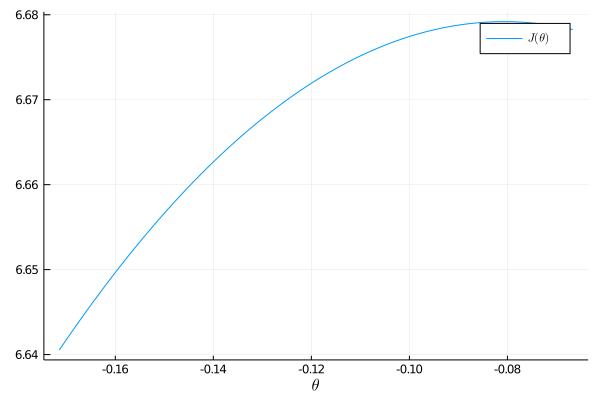

In [5]:
plt=plot(θ_space,J_space,label=L"J(\theta)", xlabel = L"\theta")

The next code generates a figure that plots the value function from the Ramsey Planner’s
problem as well as that for a Ramsey planner that  must choose a constant
$ \mu $ (that in turn  equals an  implied constant $ \theta $).

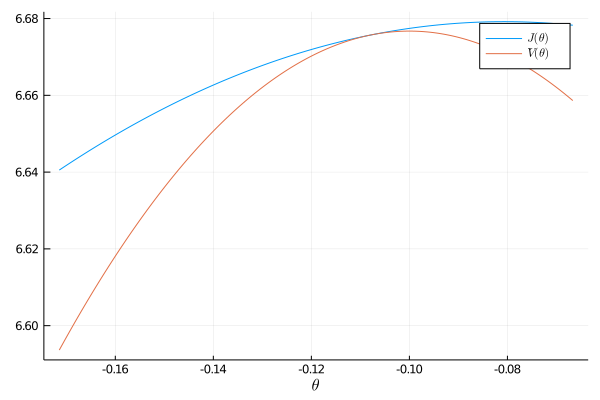

In [6]:
plot!(plt,θ_space,check_space, label = L"\check{V}(\theta)")

The next code generates  figures that plot the policy functions for a continuation Ramsey
planner.

The left figure shows the choice of $ \theta' $ chosen by a
continuation Ramsey planner who inherits $ \theta $.

The right figure plots a continuation Ramsey planner’s choice of
$ \mu $ as a function of an inherited $ \theta $.

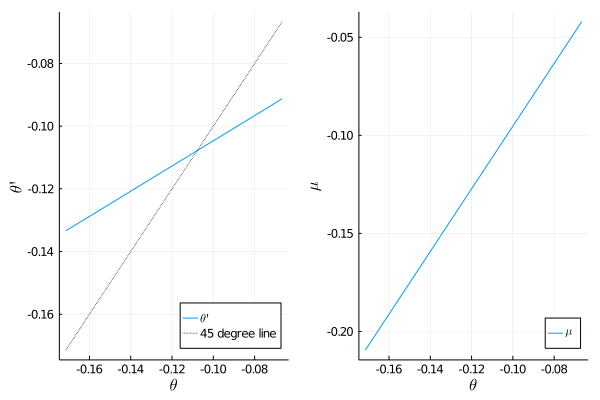

In [7]:
p1 = plot(θ_space, θ_prime, label=L"\theta'")
plot!(xlabel = L"\theta", ylabel = L"\theta'")
plot!(p1,θ_space,θ_space, line=(:dot, :black), label="45 degree line")
p2 = plot(θ_space, μ_space, label=L"\mu")
plot!(xlabel = L"\theta", ylabel = L"\mu")
plot(p1,p2)
plot!(legend = :bottomright)

The following code generates a figure that plots sequences of $ \mu $ and $ \theta $
in the Ramsey plan and compares these to the constant levels in a MPE
and in a Ramsey plan with a government restricted to set $ \mu_t $
to a constant for all $ t $.

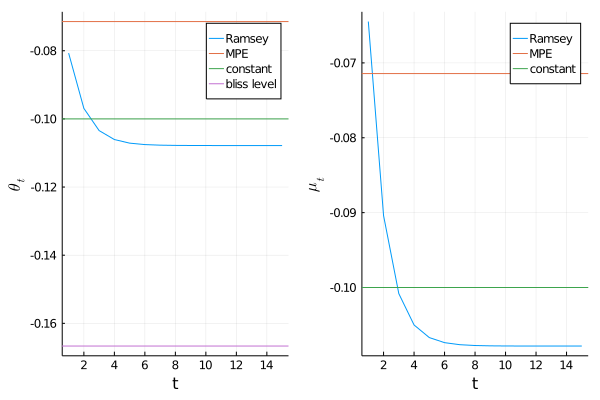

In [8]:
function plot_ramsey_MPE(Time)
    p1 = plot([θ_series[2,1:Time]], label="Ramsey")
    plot!(p1,[θ_MPE], seriestype="hline", label="MPE")
    plot!(p1,[μ_check], seriestype="hline", label="constant")
    plot!(p1,[θ_B], seriestype="hline", label="bliss level")
    plot!(xlabel = "t", ylabel = L"\theta_t")
    p2 = plot(μ_series[1:Time], label="Ramsey")
    plot!(p2,[μ_MPE], seriestype="hline", label="MPE")
    plot!(p2,[μ_check], seriestype="hline", label="constant")
    plot!(xlabel = "t", ylabel = L"\mu_t")
    plot(p1,p2)
end

plot_ramsey_MPE(15)

### Time Inconsistency of Ramsey Plan

The variation over time in $ \vec \mu $ chosen by the Ramsey planner
is a symptom of time inconsistency.

- The Ramsey planner reaps immediate benefits from promising lower
  inflation later to be achieved by costly distorting taxes.  
- These benefits are intermediated by reductions in expected inflation
  that precede the  reductions in money creation rates that rationalize them, as indicated by
  equation [(3)](#equation-eq-old3).  
- A government authority offered the opportunity to ignore effects on
  past utilities and to reoptimize at date $ t \geq 1 $ would, if allowed, want
  to deviate from a Ramsey plan.  


**Note:** A modified Ramsey plan constructed under the restriction that
$ \mu_t $ must be constant over time is time consistent (see
$ \check \mu $ and $ \check \theta $ in the above graphs).

### Meaning of Time Inconsistency

In settings in which governments actually choose sequentially, many economists
regard a time inconsistent plan implausible because of the incentives to
deviate that occur along the plan.

A way to summarize this *defect* in a Ramsey plan is to say that it
is not credible because there  endure incentives for policymakers
to deviate from it.

For that reason, the Markov perfect equilibrium concept attracts many
economists.

- A Markov perfect equilibrium plan is constructed to insure that government policymakers who choose sequentially do not want to deviate from it.  


The *no incentive to deviate from the plan* property is what makes the Markov perfect equilibrium concept attractive.

### Ramsey Plans Strike Back

Research by Abreu [[Abr88]](https://python-programming.quantecon.org/zreferences.html#abreu),  Chari and Kehoe [[CK90]](https://python-programming.quantecon.org/zreferences.html#chari1990sustainable)
[[Sto89]](https://python-programming.quantecon.org/zreferences.html#stokey1989reputation), and Stokey [[Sto91]](https://python-programming.quantecon.org/zreferences.html#stokey1991) discovered conditions under which a Ramsey plan can be rescued from the complaint that it is not credible.

They  accomplished this by expanding the
description of a plan to include expectations about **adverse consequences** of deviating from
it that can serve to deter deviations.

We turn to such theories of **sustainable plans** next.

## A Fourth Model of Government Decision Making

This is a model in which

- The government chooses $ \{\mu_t\}_{t=0}^\infty $ not once and
  for all at $ t=0 $ but chooses to set $ \mu_t $ at time $ t $, not before.  
- private agents’ forecasts of
  $ \{\mu_{t+j+1}, \theta_{t+j+1}\}_{j=0}^\infty $ respond to
  whether the government at $ t $ **confirms** or **disappoints**
  their forecasts of $ \mu_t $ brought into period $ t $ from
  period $ t-1 $.  
- the government at each time $ t $ understands how private agents’
  forecasts will respond to its choice of $ \mu_t $.  
- at each $ t $, the government chooses $ \mu_t $ to maximize
  a continuation discounted utility of a representative household.  

### A Theory of Government Decision Making

$ \vec \mu $ is chosen by a sequence of government
decision makers, one for each $ t \geq 0 $.

We assume the following within-period and between-period timing protocol
for each $ t \geq 0 $:

- at time $ t-1 $, private agents expect  that the government will set
  $ \mu_t = \tilde \mu_t $, and more generally that it will set
  $ \mu_{t+j} = \tilde \mu_{t+j} $ for all $ j \geq 0 $.  
- The forecasts $ \{\tilde \mu_{t+j}\}_{j \geq 0} $ determine a
  $ \theta_t = \tilde \theta_t $ and an associated log
  of real balances $ m_t - p_t = -\alpha\tilde \theta_t $ at
  $ t $.  
- Given those expectations and an associated $ \theta_t = \tilde \theta_t $, at
  $ t $ a government is free to set $ \mu_t \in {\bf R} $.  
- If the government at $ t $ **confirms** private agents’
  expectations by setting $ \mu_t = \tilde \mu_t $ at time
  $ t $, private agents expect the continuation government policy
  $ \{\tilde \mu_{t+j+1}\}_{j=0}^\infty $ and therefore bring
  expectation $ \tilde \theta_{t+1} $ into period $ t+1 $.  
- If the government at $ t $ **disappoints** private agents by setting
  $ \mu_t \neq \tilde \mu_t $, private agents expect
  $ \{\mu^A_j\}_{j=0}^\infty $ as the
  continuation policy for $ t+1 $, i.e.,
  $ \{\mu_{t+j+1}\} = \{\mu_j^A \}_{j=0}^\infty $ and therefore
  expect an associated $ \theta_0^A $ for $ t+1 $. Here $ \vec \mu^A = \{\mu_j^A \}_{j=0}^\infty $ is
  an alternative government plan to be described below.  

### Temptation to Deviate from Plan

The government’s one-period return function $ s(\theta,\mu) $
described in equation [(6)](#equation-eq-old6) above has the property that for all
$ \theta $

$$
- s(\theta, 0 ) \geq  - s(\theta, \mu) \quad
$$

This inequality implies that whenever the policy calls for the
government to set $ \mu \neq 0 $, the government could raise its
one-period payoff by setting $ \mu =0 $.

Disappointing private sector expectations in that way would increase the
government’s **current** payoff but would have adverse consequences for
**subsequent** government payoffs because the private sector would alter
its expectations about future settings of $ \mu $.

The **temporary** gain constitutes the government’s temptation to
deviate from a plan.

If the government at $ t $ is to resist the temptation to raise its
current payoff, it is only because it forecasts adverse  consequences that
its setting of $ \mu_t $ would bring for continuation  government payoffs via  alterations  in the private sector’s expectations.

## Sustainable or Credible Plan

We call a plan $ \vec \mu $ **sustainable** or **credible** if at
each $ t \geq 0 $ the government chooses to confirm private
agents’ prior expectation of its setting for $ \mu_t $.

The government will choose to confirm prior expectations only if the
long-term **loss** from disappointing private sector expectations –
coming from the government’s understanding of the way the private sector
adjusts its  expectations in response to having its prior
expectations at $ t $ disappointed – outweigh the short-term
**gain** from disappointing those expectations.

The theory of sustainable or credible plans assumes throughout that private sector
expectations about what future governments will do are based on the
assumption that governments at times $ t \geq 0 $ always act to
maximize the continuation discounted utilities that describe those
governments’ purposes.

This aspect of the theory means that credible plans always come in **pairs**:

- a credible (continuation) plan to be followed if the government at
  $ t $ **confirms** private sector expectations  
- a credible plan to be followed if the government at $ t $
  **disappoints** private sector expectations  


That credible plans come in pairs threaten to bring an explosion of plans to keep track of

- each credible plan itself consists of two credible plans  
- therefore, the number of plans underlying one plan is unbounded  


But Dilip Abreu showed how to render manageable the number of plans that must be kept track of.

The key is an  object called a **self-enforcing** plan.

### Abreu’s Self-Enforcing Plan

A plan $ \vec \mu^A $ (here the superscipt $ A $ is for Abreu) is said to be **self-enforcing** if

- the consequence of disappointing private agents’ expectations at time
  $ j $ is to **restart**  plan $ \vec \mu^A $  at time $ j+1 $  
- the consequence of restarting the plan is sufficiently adverse that it forever deters all
  deviations from the plan  


More precisely, a government plan $ \vec \mu^A $ with equilibrium inflation sequence $ \vec \theta^A $ is
**self-enforcing** if


<a id='equation-eq-old10'></a>
$$
\begin{aligned}
v_j^A & = - s(\theta^A_j, \mu^A_j) + \beta v_{j+1}^A \\
& \geq - s(\theta^A_j, 0 ) + \beta v_0^A \equiv v_j^{A,D}, \quad j \geq 0
\end{aligned} \tag{10}
$$

(Here it is useful to recall that setting $ \mu=0 $ is the maximizing choice for the government’s one-period return function)

The first line tells the consequences of confirming private agents’
expectations by following the plan, while the second line tells the consequences of
disappointing private agents’ expectations by deviating from the plan.

A consequence of the inequality stated in the  definition is that a self-enforcing plan is
credible.

Self-enforcing plans can be used to construct other credible plans, including ones with better values.

Thus, where $ \vec v^A $ is the value associated with a self-enforcing plan $ \vec \mu^A $,
a sufficient condition for another plan $ \vec \mu $ associated with inflation $ \vec \theta $ and value $ \vec v $  to be **credible** is that


<a id='equation-eq-old100a'></a>
$$
\begin{aligned}
v_j & = - s( \theta_j, \mu_j) + \beta  v_{j+1} \\
& \geq  -s( \theta_j, 0) + \beta v_0^A \quad \forall j \geq 0
\end{aligned} \tag{11}
$$

For this condition to be satisfied it is necessary and sufficient that

$$
-s( \theta_j, 0) - ( - s( \theta_j, \mu_j) )  <  \beta ( v_{j+1} - v_0^A )
$$

The left side of the above inequality is the government’s **gain** from deviating from the plan, while the right side is the government’s **loss** from deviating
from the plan.

A government never wants to deviate from a credible plan.

Abreu taught us that  key step in constructing a credible plan is first constructing a
self-enforcing plan that has a low time $ 0 $ value.

The idea is to use the self-enforcing plan as a continuation plan whenever
the government’s choice at time $ t $ fails to confirm private
agents’ expectation.

We shall use a construction featured in Abreu ([[Abr88]](https://python-programming.quantecon.org/zreferences.html#abreu)) to construct a
self-enforcing plan with low time $ 0 $ value.

### Abreu Carrot-Stick Plan

Abreu ([[Abr88]](https://python-programming.quantecon.org/zreferences.html#abreu)) invented a way to create a self-enforcing plan with a low
initial value.

Imitating his idea, we can construct a self-enforcing plan
$ \vec \mu $ with a low time $ 0 $ value to the government by
insisting that future government decision makers set $ \mu_t $ to a value yielding low
one-period utilities to the household for a long time, after which
government  decisions thereafter  yield high one-period utilities.

- Low one-period utilities early are a **stick**  
- High one-period utilities later are a **carrot**  


Consider a candidate plan $ \vec \mu^A $ that sets
$ \mu_t^A = \bar \mu $ (a high positive
number) for $ T_A $ periods, and then reverts to the Ramsey plan.

Denote this sequence by $ \{\mu_t^A\}_{t=0}^\infty $.

The sequence of inflation rates implied by this plan,
$ \{\theta_t^A\}_{t=0}^\infty $, can be calculated using:

$$
\theta_t^A = \frac{1}{1+\alpha} \sum_{j=0}^{\infty} \left(\frac{\alpha}{1+\alpha}\right)^j \mu^A_{t+j}
$$

The value of $ \{\theta_t^A,\mu_t^A \}_{t=0}^\infty $ at time $ 0 $ is

$$
v^A_0 =  - \sum_{t=0}^{T_A-1} \beta^t s(\theta_t^A,\mu_t^A) +\beta^{T_A} J(\theta^R_0)
$$

For an appropriate $ T_A $, this plan can be verified to be self-enforcing and therefore credible.

### Example of Self-Enforcing Plan

The following example implements an Abreu stick-and-carrot plan.

The government sets $ \mu_t^A = 0.1 $ for $ t=0, 1, \ldots, 9 $
and then starts the **Ramsey plan**.

We have computed outcomes for this plan.

For this plan, we plot the $ \theta^A $, $ \mu^A $ sequences as
well as the implied $ v^A $ sequence.

Notice that because the government sets money supply growth high for 10
periods, inflation starts high.

Inflation gradually slowly declines  because people  expect the government to lower the money growth rate after period
$ 10 $.

From the 10th period onwards, the inflation rate $ \theta^A_t $
associated with this **Abreu plan** starts the Ramsey plan from its
beginning, i.e., $ \theta^A_{t+10} =\theta^R_t \ \ \forall t \geq 0 $.

In [12]:
T_A = 9
μ_bar = 0.1

μ_A = [ones(T_A)*μ_bar; μ_series]
θ_A = zeros(T_A+T)
discount = ones(T_A+T)
for j in 2:T_A+T
    discount[j] = (α/(1+α))^(j-1)
end

for t in 1:T_A+T
    θ_A[t] = 1/(α+1) * sum(discount[1:end-(t-1)] .*μ_A[t:end])
end



# Calculate utility of stick plan
U_A = zeros(T_A+T)
for t in 1:T_A+T
    U_A[t] = β^(t-1) * (α0 + α1 * (-θ_A[t])
        - α2 / 2 * (-θ_A[t])^2 - c * μ_A[t]^2)
end

V_A = zeros(T_A+T)
for t in 1:T_A+T
    V_A[t] = sum(U_A[t:end] / β^(t-1)) 
end

# Make sure Abreu plan is self-enforcing
V_dev = zeros(T_A+T)
for t in 1:T_A+T
     V_dev[t] = (α0 + α1 * (-θ_A[t])
        - α2 / 2 * (-θ_A[t])^2) + β * V_A[1]
end

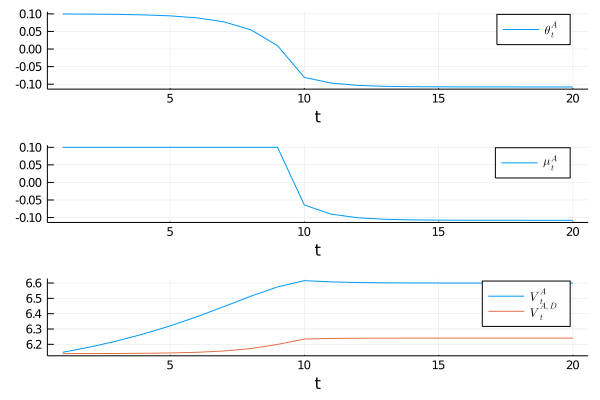

In [13]:
function abreu_plan(T_Plot)
    p1 = plot(θ_A[1:T_Plot], label = L"\theta_t^A")
    p2 = plot(μ_A[1:T_Plot], label = L"\mu_t^A")
    p3 = plot(V_A[1:T_Plot], label = L"V_t^A")
    plot!(p3,V_dev[1:T_Plot], label = L"V_t^{A,D}")
    plot(p1,p2,p3, layout = (3,1))
    plot!(xlabel = "t")
end
abreu_plan(20)

To confirm that the plan $ \vec \mu^A $ is **self-enforcing**,  we
plot an object that we call $ V_t^{A,D} $, defined in the key inequality in the second line of equation [(10)](#equation-eq-old10) above.

$ V_t^{A,D} $ is the value at $ t $ of deviating from the
self-enforcing plan $ \vec \mu^A $ by setting $ \mu_t = 0 $ and
then restarting the plan at $ v^A_0 $ at $ t+1 $:

$$
v_t^{A,D} = -s( \theta_j, 0) + \beta v_0^A
$$

In the above graph  $ v_t^A > v_t^{A,D} $, which confirms that $ \vec \mu^A $ is a self-enforcing plan.

We can also verify the inequalities required for $ \vec \mu^A $ to
be self-confirming numerically as follows

In [16]:
V_A[1:T_A]>V_dev[1:T_A]

true

Given that plan $ \vec \mu^A $ is self-enforcing, we can check that
the Ramsey plan $ \vec \mu^R $ is credible by verifying that:

$$
v^R_t \geq - s(\theta^R_t,0) + \beta v^A_0 , \quad \forall t \geq 0
$$

In [17]:
J_series>V_dev

true

### Recursive Representation of a Sustainable Plan

We can represent a sustainable plan recursively by taking the
continuation value $ v_t $ as a state variable.

We form the following 3-tuple of functions:


<a id='equation-eq-old11'></a>
$$
\begin{aligned}
\hat \mu_t & = \nu_\mu(v_t) \\
\theta_t & = \nu_\theta(v_t) \\
v_{t+1} & = \nu_v(v_t, \mu_t )
\end{aligned} \tag{12}
$$

In addition to these equations, we need an initial value $ v_0 $ to
characterize a sustainable plan.

The first equation of [(12)](#equation-eq-old11) tells the recommended value of
$ \hat \mu_t $ as a function of the promised value $ v_t $.

The second equation of [(12)](#equation-eq-old11)  tells the inflation rate as a function of
$ v_t $.

The third equation of [(12)](#equation-eq-old11)  updates the continuation value in a way that
depends on whether the government at $ t $ confirms private agents’
expectations by setting $ \mu_t $ equal to the recommended value
$ \hat \mu_t $, or whether it disappoints those expectations.

## Whose Credible Plan is it?

A credible government plan $ \vec \mu $ plays multiple roles.

- It is a sequence of actions chosen by the government.  
- It is a sequence of private agents’ forecasts of government actions.  


Thus, $ \vec \mu $ is both a government policy and a collection of private agents’ forecasts of  government policy.

Does the government *choose*  policy actions or does it simply *confirm* prior private sector forecasts of those actions?

An argument in favor of the *government chooses* interpretation comes from noting that the theory of credible plans builds in a theory that the government each period chooses
the action that it wants.

An argument in favor of the *simply confirm* interpretation is gathered from staring at the key inequality [(11)](#equation-eq-old100a) that defines a credible policy.

## Comparison of Equilibrium Values

We have computed plans for

- an ordinary (unrestricted) Ramsey planner who chooses a sequence
  $ \{\mu_t\}_{t=0}^\infty $ at time $ 0 $  
- a Ramsey planner restricted to choose a constant $ \mu $ for all
  $ t \geq 0 $  
- a Markov perfect sequence of governments  


Below we compare equilibrium time zero values for these three.

We confirm that the value delivered by the unrestricted Ramsey planner
exceeds the value delivered by the restricted Ramsey planner which in
turn exceeds the value delivered by the Markov perfect sequence of
governments.

In [18]:
J_series[1]>J_check>J_MPE

true

We have also computed **credible plans** for a government or sequence
of governments that choose sequentially.

These include

- a **self-enforcing** plan that gives a low initial value $ v_0 $.  
- a better plan – possibly one that attains values associated with
  Ramsey plan – that is not self-enforcing.  

## Note on Dynamic Programming Squared

The theory deployed  in this lecture is an application of what we  nickname **dynamic programming squared**.

The nickname refers to the fact that a value satisfying one Bellman equation is itself an argument in a second Bellman equation.

Thus, our models have involved two Bellman equations:

- equation [(1)](#equation-eq-old1) expresses how $ \theta_t $ depends on $ \mu_t $
  and $ \theta_{t+1} $  
- equation [(4)](#equation-eq-old4) expresses how value $ v_t $ depends on
  $ (\mu_t, \theta_t) $ and $ v_{t+1} $  


A value $ \theta $ from one Bellman equation appears as an argument of a second Bellman equation for another value $ v $.